In [1]:
import scipy.stats as sts

T = 500
sigma = 0.7
unif_vec = sts.uniform.rvs(loc=0, scale=1, size=T, random_state=25)
eps_vec = sts.norm.ppf(unif_vec, loc=0, scale=sigma)

(a)

In [2]:
z = []
ro = 0.85
mu = 11.4

for i in range(T):
    if i == 0 :
        z_t = mu
        z += [z_t]
    else:
        z_t = ro * z_t + (1 - ro) * mu + eps_vec[i] 
        z += [z_t]

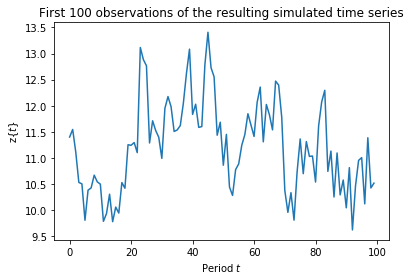

In [3]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.plot(range(100), z[:100])
plt.title('First 100 observations of the resulting simulated time series')
plt.xlabel(r'Period $t$')
plt.ylabel(r'z{$t$}')
plt.show()

(b)

In [4]:
import numpy as np
z_vals = np.array([mu + i * 1.5 * sigma for i in range(-2, 3)])

In [5]:
z_vals

array([ 9.3 , 10.35, 11.4 , 12.45, 13.5 ])

(c)

In [6]:
z_cuts = 0.5 * z_vals[:-1] + 0.5 * z_vals[1:]

In [7]:
z_bin = []

for i in range(T):
    if z[i] <= z_cuts[0]:
        z_bin += [1]
    elif z[i] <= z_cuts[1]:
        z_bin += [2]
    elif z[i] <= z_cuts[2]:
        z_bin += [3]
    elif z[i] <= z_cuts[3]:
        z_bin += [4]
    else:
        z_bin += [5]     

In [8]:
markov_matrix = [[0] * 5 for i in range(5)]

for i in range(T - 1):
    pre = z_bin[i]
    now = z_bin[i + 1]
    markov_matrix[pre - 1][now - 1] += 1

In [9]:
markov_matrix = markov_matrix / (np.sum(markov_matrix, axis = 1).reshape(5,1))
markov_matrix

array([[0.65384615, 0.30769231, 0.03846154, 0.        , 0.        ],
       [0.11666667, 0.53333333, 0.31666667, 0.03333333, 0.        ],
       [0.0308642 , 0.21604938, 0.48765432, 0.22839506, 0.03703704],
       [0.        , 0.04273504, 0.34188034, 0.5042735 , 0.11111111],
       [0.        , 0.        , 0.04166667, 0.35416667, 0.60416667]])

(d)

In [10]:
import numpy.linalg as LA
X_now = np.array([0, 0, 1, 0, 0])
X_next = np.dot(LA.matrix_power(markov_matrix.T, 3), X_now)
print('The probability of zt+3 being in bin 5 given that zt is in bin 3: ', X_next[4])

The probability of zt+3 being in bin 5 given that zt is in bin 3:  0.08152797732142057


(e)

In [11]:
threshold = 0.00001
diff = 1
X_now = np.array([0, 0, 1, 0, 0])

while diff > threshold:
    X_next = np.dot(markov_matrix.T, X_now)
    X_diff = X_next - X_now
    diff = np.sum(X_diff)
    X_now = X_next

In [12]:
print('The stationary distribution of zt is ', X_now)

The stationary distribution of zt is  [0.0308642  0.21604938 0.48765432 0.22839506 0.03703704]


(f)

In [13]:
z_compare = []
z_t = z_vals[2]
zt_ind = 2
    
for i in range(T): 
    
    ztp_ind_now = np.argwhere(unif_vec[i] <= np.cumsum(markov_matrix[zt_ind, :])).min()
    z_tp_now = z_vals[ztp_ind_now]
    z_compare += [z_tp_now]

    z_t = z_tp_now
    zt_ind = ztp_ind_now

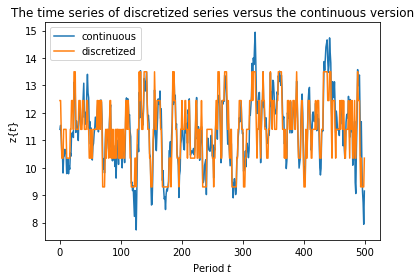

In [14]:
plt.plot(range(500), z, label = 'continuous')
plt.plot(range(500), z_compare, label = 'discretized')
plt.title('The time series of discretized series versus the continuous version')
plt.xlabel(r'Period $t$')
plt.ylabel(r'z{$t$}')
plt.legend()
plt.show()